# Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
import seaborn as sns
from clipped_matrix_completion.methods.Fro.recommenders import ALSUVFroFroCMFRecommender, ALSUVFroFroCMFRecommenderWithoutNumba

In [2]:
# Visualization parameters
linewidths = 2.0
linecolor = 'darkgrey'
cmap = mpl.colors.ListedColormap(['w', '0.7', 'k'])
cmap.set_bad('white',1.)
eps=1e-5
vmin=0
fontsize = 30

# Methods for visualization
empty_labels = ['']*5
def show_fig(data, C, test_max, fmt='g'):
    bounds = [0., C-eps, C+eps, 15]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig = plt.figure()
    sns.heatmap(data, cmap=cmap, norm=norm, linecolor=linecolor, linewidths=linewidths, vmin=vmin, vmax=test_max, annot=True, fmt=fmt, cbar=False, xticklabels=empty_labels, yticklabels=empty_labels, annot_kws={"size": fontsize})
    plt.show()

## Illustration

Clipping threshold $C$

In [3]:
C = 10

True Matrix $M$

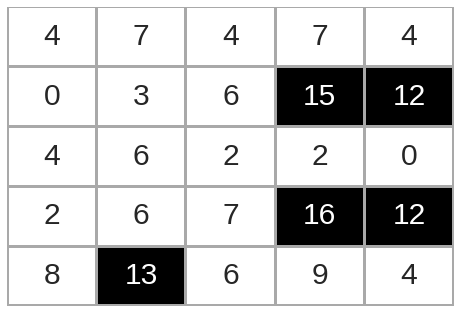

In [4]:
test = np.array(
    [[4, 7, 4, 7, 4],
     [0, 3, 6, 15, 12],
     [4, 6, 2, 2, 0],
     [2, 6, 7, 16, 12],
     [8, 13, 6, 9, 4]]).astype(np.float32)
show_fig(test, C, test.max())

Training Data $M_\Omega^c$

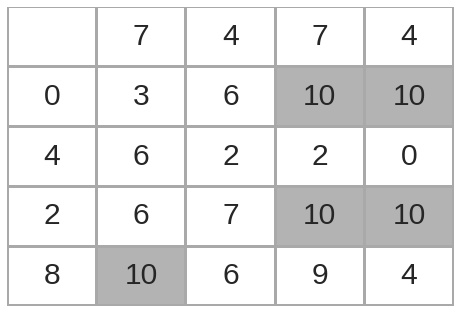

In [5]:
train = np.array(
    [[np.nan, 7, 4, 7, 4],
     [0, 3, 6, 10, 10],
     [4, 6, 2, 2, 0],
     [2, 6, 7, 10, 10],
     [8, 10, 6, 9, 4]]).astype(np.float32)
show_fig(train, C, test.max())

Apply Fro-CMC to get $\widehat M$

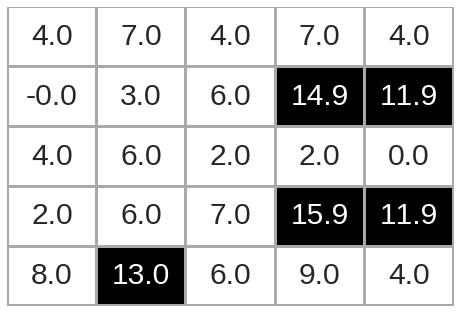

In [6]:
rank = 2
lam = 0.00005
iters = 1000

model = ALSUVFroFroCMFRecommenderWithoutNumba(censoring_threshold=C, rank=rank, max_iter=iters, lam=lam)
model.factorize(train)
pred = model.predict_all()

show_fig(pred, C, test.max(), fmt='.1f')